# Fuzzy statistical inference for the parameter of a Beta model

Julian Sampedro, May 2023

## First approach (incomplete and inconclusive)

1. Define a function that yields as output a scalar representing the membership grade of a fuzzy triangular number(p,q,r) - Berkachy, p.16 - given the following arguments: p,q,r and x: a real


In [147]:
fuzzytriangular = function(p,q,r,x) {
  if(p < x & x < q) {return((x - p) / (q - p))}
  if(q < x & x < r) {return((r - x) / (r - q))}
  else return(0)
}

In [148]:
# p=1, q=2, r = 3, x=2.2
fuzzytriangular(0,2,3,2.2)

[1] 0.8

If x is a beta realization with shape1 = 1/theta, with theta = 3 and shape2 = 1, then

In [149]:
set.seed(2023)
theta = 3
x = rbeta(n = 1, shape1 = 1/theta, shape2 = 1) 
x

[1] 0.3323928

In this example, we just assume that the argument x provided as input ia a beta realization. The membership grade is then

In [150]:
fuzzy_theta <- fuzzytriangular(p=0, q=2, r=3, x=x)
fuzzy_theta

[1] 0.1661964

We can not make inference based on a point estimate even though we have its menbership grade (?). We then examine the possibility to construct asymptotic and exact $(1-\beta)*100$ Confidence Intervals in the fashion of the method described in the book 'Fuzzy Statistics' (J.J.Buckley, 2004). First, we introduce the model, how to obtain a Maximum Likelihood Estimator (MLE) and how to compute Confidence Intervals. Then we use a numerical example.

## The Beta distribution: basics


Let us consider the following parametric Beta model

$$ 
\bigg\{ Beta \bigg(\mathbf{\frac{1}{\theta}, 1\bigg)} \ ; \ \theta > 0   \bigg\} 
$$


and suppose that a sample $x_{1},..., x_{n}$ is observed. In addition, let us recall the PDF of a standard $Beta(\alpha, \beta)$ distribution, parametrized by two real numbers $\alpha$ and $\beta$, $B(\alpha, \beta)$ being the Beta function.

$$
\begin{align*}
 f_{\alpha, \beta }(x) = \frac{ 1   }{ B(\alpha, \beta)  } x^{\alpha - 1}   (1-x)^{\beta - 1 } \   \\
\end{align*}
$$


The distribution according to our initial model reduces to

$$
\begin{align*}
 f_{\theta }(x) = \frac{1}{\theta} x^{\frac{1}{\theta}- 1}     \\
\end{align*}
$$


## Some considerations


Our goal is to find a Maximum Likelihood (ML) estimator for $\theta$.

First, let us show that $B\bigg(   \frac{1}{\theta}, 1\bigg) = \theta$. Indeed, since  


$$
\begin{align*}
B(\alpha, \beta) = \frac{\Gamma(\alpha) \ \Gamma(\beta)}{ \Gamma(\alpha + \beta)}  \\
\end{align*}
$$

we have that

$$
B\bigg(   \mathbf{\frac{1}{\theta}, 1\bigg)} = \frac{\Gamma(\theta^{-1}) \ \Gamma(1)}{ \Gamma \big(\frac{1}{\theta}+ 1 \big)} = \frac{\Gamma(\frac{1}{\theta})}{ \frac{1}{\theta} \ \Gamma \big(\frac{1}{\theta}\big)} = \frac{1}{\frac{1}{\theta}} = \theta
$$


Suppose we choose $\theta = 3$, the distribution (also called a Standard Power Function distribution) becomes

$$
\begin{align*}
 f_{\theta }(x) = \frac{1}{3} x^{\frac{-2}{3}}    \\
\end{align*}
$$



## Maximum Likelihood estimation

For our Beta model, the Maximum Likelihood Estimator $\hat{\theta}_{MLE}$ for $\theta$ is given by the expression $ - \frac{ \sum\limits_{i=1}^{n}  ln(x_{i})}{ n} $. Indeed,


$$
\begin{align*} 
& \mathcal{L}(\theta \mid \textbf{x} ) =  \prod_{i=1}^{n} f_{\theta}(x_{i}) = \prod_{i=1}^{n} \frac{ 1   }{B\bigg(   \mathbf{\frac{1}{\theta}, 1\bigg)} } x_{i}^{\frac{1}{\theta} - 1}   (1-x_{i})^{1 - 1 }     \\
& \ \ \ \ \ \ \ \   =   \frac{1}{\theta^{n}} \  \bigg(  \prod_{i=1}^{n} x_{i} \bigg)^{     \frac{1}{\theta} - 1}    \  \prod_{i=1}^{n}  \\
& l(\theta \mid \textbf{x} ) = -n \ ln(\theta) + \bigg( \frac{1}{\theta} - 1  \bigg)  \sum_{i=1}^{n} ln(x_{i}) + \sum_{i=1}^{n}   \\
\end{align*}
$$

Next, we differentiate the log-likelihood function with respect to the model parameter $\theta$, so that we have

$$
\begin{align*} 
&  \frac{ \partial  \ l  ( \theta \mid \textbf{x})} {\partial \theta} =  - n \frac{1}{\theta}   - \frac{1}{\theta^{2}}  \sum_{i=1}^{n} ln(x_{i})      \\
\end{align*}
$$

Setting this derivative equal to $0$ and solving for $\theta$ then yields

$$
- \frac{n}{\theta} = \frac{1}{\theta^{2}}  \sum_{i=1}^{n} ln(x_{i})    \ \ \ \ \ \ \Leftrightarrow \ \ \ \ \ \ \  \hat{\theta}_{MLE} =  - \frac{1}{n} \sum_{i=1}^{n}  ln(x_{i}) 
$$


which is our MLE. Let's perform ML estimation with R then with Python next



To construct a fuzzy estimator for $\theta$, the parameter of our Beta model, we have at least two options, namely the asymptotic behavior of the Maximum Likelihood Estimator and the $\delta$-method.

Asymptotic behavior of the MLE (theorem):

Let $\theta_{n}(x_{1},...x_{n})$ be the MLE of $\theta$ Under the assumption that the Fisher information exists, we have that

$$
\sqrt{n}(\theta_{n}(x_{1},...x_{n}) - \theta \xrightarrow{L} N_{p}(0, I^{-1}(\theta)).
$$

The next step is to assess some properties of the MLE and derive the Fisher information. We will use those results for the construction of our confidence intervals.

## Unbiasedness and consistency of the MLE

Let us first define $y_{i} = -ln(x_{i})$. Then we have that 

$$
\hat{\theta}_{MLE} = - \frac{1}{n} \sum_{i=1}^{n} ln(x_{i}) = \frac{1}{n} \sum_{i=1}^{n} y_{i} = \bar{y}
$$

So since 

$$
E[\hat{\theta}_{MLE}] = E[\bar{y}] = \frac{1}{n} \sum_{i=1}^{n} E[y_{i}] = E[Y] = \frac{1}{1/\theta} = \theta,
$$

we consclude that $\hat{\theta}_{MLE}$ is an unbiased estimator for $\theta$. Next, by the Law of Large Numbers (LLN), we have

$$
\frac{1}{n} \sum_{i=1}^{n} y_{i} \xrightarrow{L} E[Y] = \theta.
$$

So we conclude that $\hat{\theta}_{MLE}$ is a consistent estimator for $\theta$. This will help us construct asymptotic confidence intervals which have desirable properties.


## Fisher information of the sample

The derivative of the log-likelihood function with respect to our parameter is rewritten as

$$
\frac{ \partial  \ l  ( \theta \mid \textbf{x})} {\partial \theta} =  -  \frac{n}{\theta}   - \frac{1}{\theta^{2}}  \sum_{i=1}^{n} ln(x_{i})    =  - \frac{n}{\theta}   + \frac{1}{\theta^{2}}  \sum_{i=1}^{n} y_{i}
$$

Then the fisher information of the sample, denoted by $I(\theta)$ is the variance of this partial derivative. We have

$$
\begin{align*}
I(\theta) & = var\bigg(\underbrace{- \frac{n}{\theta}}_{constant}   + \frac{1}{\theta^{2}}  \sum_{i=1}^{n} y_{i}\bigg) \\
& = var\bigg(\frac{1}{\theta^{2}}  \sum_{i=1}^{n} y_{i} \bigg) \\
& = \frac{1}{\theta^{4}} var \bigg(\sum_{i=1}^{n} y_{i} \bigg) \\
& =\frac{1}{\theta^{4}} n var( Y ) \\
& = \frac{n \theta^{2}}{\theta^{4}} \\
& = \frac{n }{\theta^{2}} \\
\end{align*}
$$

We use the fact that $var(Y) = \frac{1}{(1/\theta)^{2}} = \theta^{2}$. Then the Fisher information of the sample is therefore equal to $\frac{n }{\theta^{2}}$.

## Asymptotic behaviour of the MLE

We can show that the quantity $\sqrt{n} (\hat{\theta}_{MLE} - \theta) \xrightarrow{L} N(0, I^{-1}(\theta))$. Therefore we have that $(\hat{\theta}_{MLE} - \theta) \xrightarrow{L} N \bigg(0, \frac{n\theta^2}{n} \bigg)$. And eventually that $\hat{\theta}_{MLE} \xrightarrow{L} N (\theta, \theta^2 )$.

Next, from the Central Limit Theorem (CLT), we can deduce that $\sqrt{n} \bigg(\frac{\hat{\theta}_{MLE} - \theta}{\theta} \bigg) \xrightarrow{L} N(0, 1)$ and since $\hat{\theta}_{MLE}$ is a consistent estimator for $\theta$, we have that (theory) $\sqrt{n} \bigg(\frac{\hat{\theta}_{MLE} - \theta}{\hat{\theta}_{MLE}} \bigg) \xrightarrow{L} N(0, 1)$.

We can now deduce a first confidence interval whcich states that $\theta \in [\hat{\theta}_{MLE} \pm z_{1-\beta/2} \frac{\hat{\theta}_{MLE}}{n}]$ where $z_{1-\beta/2}$ is the $1-\beta/2$ quantile of the standard Normal distribution.

Inspired from the method described in the book of J.J. Buckley, we will construct a series of $(1-\beta)100\%$ confidence intervals for all $\beta \in [0.01, 1]$. We will then find a set of $200$ confidence intervals that we will place on top of each other to construct our fuzzy estimator $\bar{\theta}$ for $\theta$ (see chapter 3 and followings). This lead us to a more complete second approach for which the simple code is on the next section.

## Second approach

Suppose that we observe a sample of size $60$ and decide to make inference by modeling the data with our univariate Beta model. In this setup, for the simulations, we chose parameter $\theta = 3$ but of course this particular value is unknown in practice and can be estimated by maximum likelihood for example. Let us construct an asymptotic set of fuzzy confidence intervals to estimate our fuzzy parameter $\bar{\theta}$.

In [151]:
set.seed(2023)
theta = 3; n = 60
x_sample = rbeta(n = n, shape1 = 1/theta, shape2 = 1) 

# MLE
theta_hat = - (1/n) *sum(log(x_sample))

In [152]:
beta = seq(0.01:1, by = 0.01)
asy1CIl= theta_hat - qnorm(1-beta/2)*(theta_hat/n) # lower bounds
asy1CIu = theta_hat + qnorm(1-beta/2)*(theta_hat/n) # upper bounds

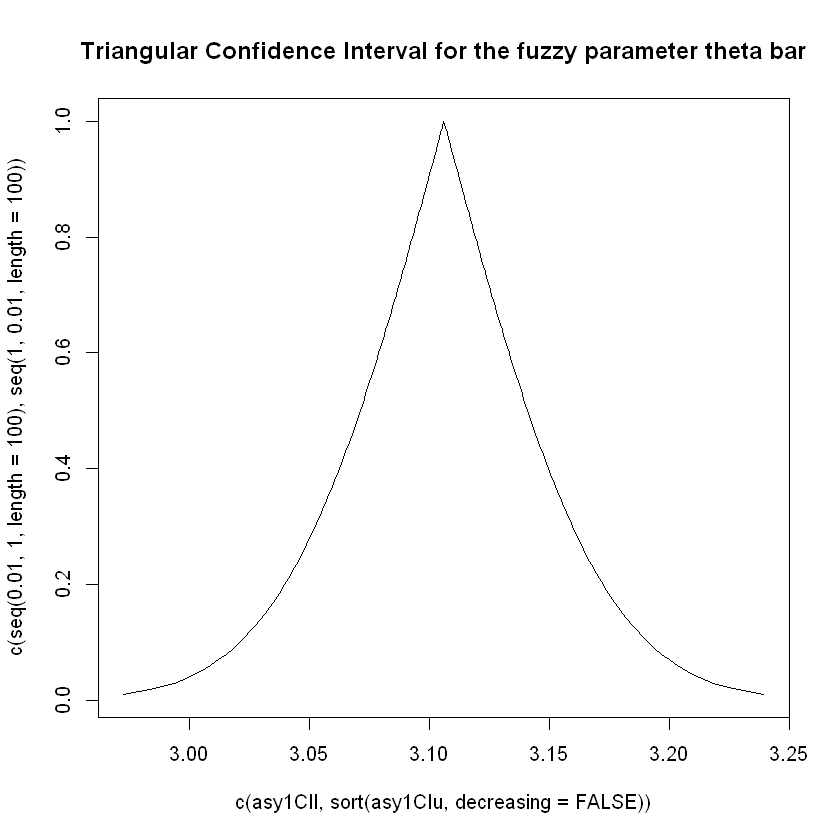

In [153]:
plot(x = c(asy1CIl, sort(asy1CIu, decreasing = FALSE)), y = c(seq(0.01, 1, length = 100), seq(1, 0.01, length = 100)), type = 'l',
    main = 'Triangular Confidence Interval for the fuzzy parameter theta bar')

We now have a fuzzy estimator $\bar{\theta}[\alpha] = [\bar{\theta}_{1}(\alpha), \bar{\theta}_{2}(\alpha)]$ in the form of a triangular fuzzy number. If we consider the endpoint of the largest confidence interval to be the support of the fuzzy number and the value on the x-axis for which the membership grade is one to be the core of the fuzzy number, then we can then compute the membership grade of a point estimate, for example the MLE.

In [162]:
fuzzytriangular(p = min(asy1CIl), q = max(asy1CIl), r = max(asy1CIu), x = round(theta_hat,4))

[1] 0.999856

There exist many different ways to construct asymptotic confidence interval for this parameter but also an exact confidence interval. Let us explore that next.

Under this form, with one parameter, our initial model is known as a Standard Power Function model. 

If $X_{1}, ..., X_{n}$ are iid with an exponential distribution of parameter $\lambda$, then the quantity $2\lambda \sum_{i=1}^{n} x_{i} \sim \chi^{2}(2n)$. So we have that $\frac{2n}{\theta} \hat{\theta}_{MLE} \sim \chi^{2}(2n)$ Therefore, an exact $(1-\beta)100 \%$ confidence interval can be derived as follows:

$$
\begin{align*}
P \bigg(\chi^{2}_{1-\beta/2}(2n) \leq \frac{2n \hat{\theta}_{MLE}}{\theta} \leq \chi^{2}_{\beta/2}(2n) \bigg) = 1-\beta \\
P \bigg(\frac{\chi^{2}_{1-\beta/2}(2n) }{2n \hat{\theta}_{MLE}} \leq \frac{1}{\theta} \leq \frac{\chi^{2}_{\beta/2}(2n)}{2n \hat{\theta}_{MLE}} \bigg) = 1-\beta \\
P \bigg(\frac{2n \hat{\theta}_{MLE}}{\chi^{2}_{1-\beta/2}(2n)} \leq \theta  \leq \frac{2n \hat{\theta}_{MLE}}{\chi^{2}_{\beta/2}(2n)}  \bigg) = 1-\beta \\
\end{align*}
$$

So we have $\theta \in [\frac{2n \hat{\theta}_{MLE}}{\chi^{2}_{1-\beta/2}(2n)}  \pm \frac{2n \hat{\theta}_{MLE}}{\chi^{2}_{\beta/2}(2n)}]$.

In [118]:
beta = seq(0.01:1, by = 0.01)
exactCIl= 2*n*theta_hat / qchisq(1-beta/2, df = 2*n) # lower bounds
exactCIu = 2*n*theta_hat / qchisq(beta/2, df = 2*n) # upper bounds

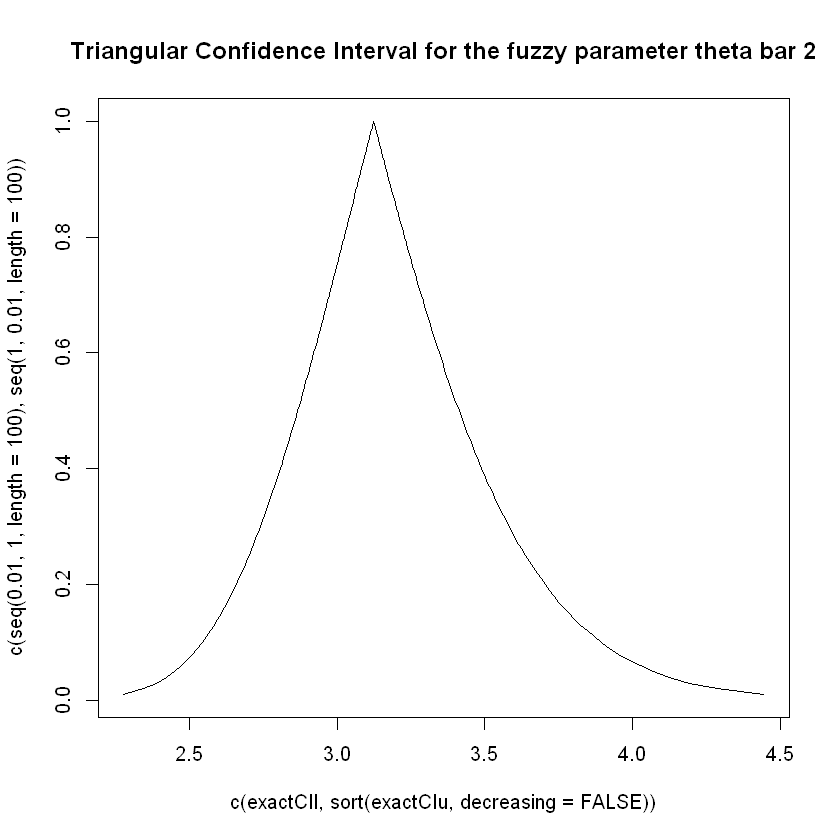

In [140]:
plot(x = c(exactCIl, sort(exactCIu, decreasing = FALSE)), y = c(seq(0.01, 1, length = 100), seq(1, 0.01, length = 100)), type = 'l',
    main = 'Triangular Confidence Interval for the fuzzy parameter theta bar 2')

We now have another fuzzy estimator $\bar{\theta}^{*}[\alpha] = [\bar{\theta}^{*}_{1}(\alpha), \bar{\theta}^{*}_{2}(\alpha)]$ in the form of a triangular fuzzy number.

In [165]:
fuzzytriangular(p = min(exactCIl), q = max(exactCIl), r = max(exactCIu), x = round(theta_hat,4))

[1] 0.9794815

## References

J.J.Buckley: Fuzzy Statistics, Springer, 2004

R.V.Hogg and E.A.Tanis: Probability and Statistical Inference, Sixth
Edition, Prentice Hall, Upper Saddle River, N.J., 2001.

Bijma, F., Jonker M., Van der Vaart, A., An Introduction to Mathematical Statistics. Amsterdam University Press., 2016